# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
my_api_key = weather_api_key
my_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = my_url + "q=" + cities[i] + "&APPID=" + my_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | savelugu
Processing Record 3 of Set 1 | kalemie
Processing Record 4 of Set 1 | kalmunai
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | roma
Processing Record 7 of Set 1 | pokhara
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | prieska
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | ngereklmadel
Processing Record 21 of Set 1 | parauapebas
Processing Record 22 of Set 1 | atafu village
Processing Record 23 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,27.11,85,100,8.14,MU,1707679858
1,savelugu,9.6244,-0.8253,31.77,9,3,0.90,GH,1707679913
2,kalemie,-5.9475,29.1947,20.51,96,76,1.04,CD,1707679914
3,kalmunai,7.4167,81.8167,24.62,82,52,3.84,LK,1707679914
4,albany,42.6001,-73.9662,6.21,67,100,2.24,US,1707679877


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.11,85,100,8.14,MU,1707679858
1,savelugu,9.6244,-0.8253,31.77,9,3,0.90,GH,1707679913
2,kalemie,-5.9475,29.1947,20.51,96,76,1.04,CD,1707679914
3,kalmunai,7.4167,81.8167,24.62,82,52,3.84,LK,1707679914
4,albany,42.6001,-73.9662,6.21,67,100,2.24,US,1707679877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

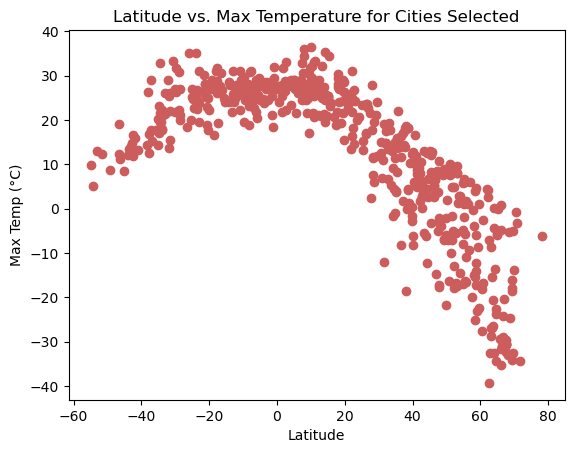

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = "indianred")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (" + chr(176) + 'C)')
plt.title("Latitude vs. Max Temperature for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

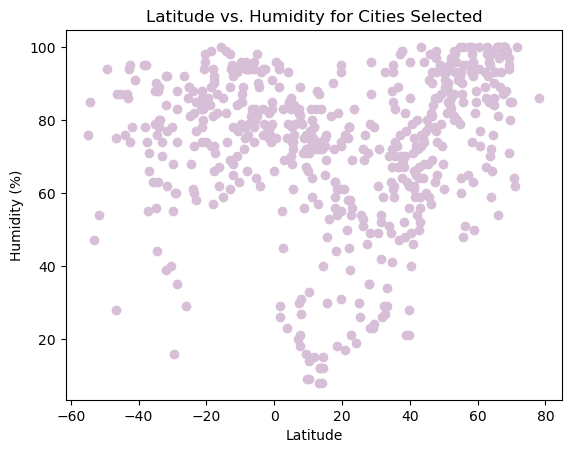

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "thistle")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

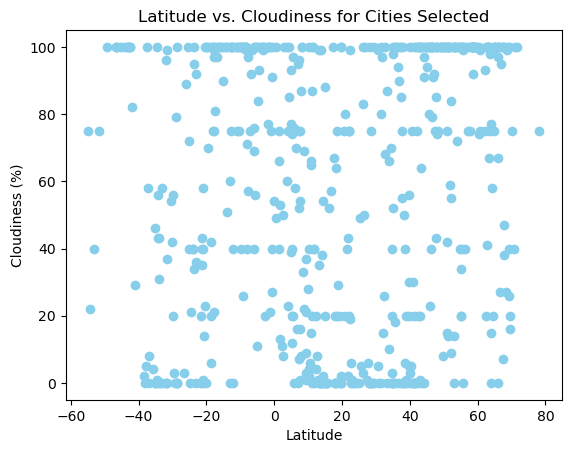

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = "skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

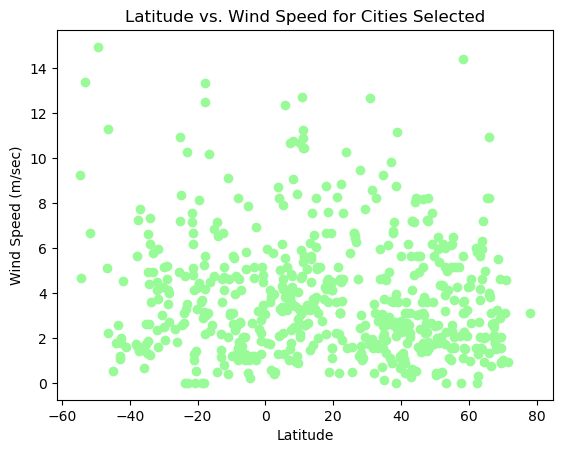

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = "palegreen")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")
plt.title("Latitude vs. Wind Speed for Cities Selected")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def linear_regression(x, 
                      y, 
                      x_label, 
                      y_label, 
                      plot_title, 
                      dotcolor,
                      text_x,
                      text_y):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Print the r-value
    print("The r-value is ", r_value)

    # Plot the data and regression line
    plt.scatter(x, y, color = dotcolor)
    plt.plot(x, slope * x + intercept, color='mediumblue', label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend()

    # Put linear regression equation on plot
    regression_equation_str = "y = " + str(float(f'{slope: .2f}')) + "*x + " + str(float(f'{intercept: .2f}'))
    plt.text(text_x, text_y, regression_equation_str, c="mediumblue", fontsize = 'x-large')

    # Show plot
    plt.show()

    # Return 
    return

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,savelugu,9.6244,-0.8253,31.77,9,3,0.90,GH,1707679913
3,kalmunai,7.4167,81.8167,24.62,82,52,3.84,LK,1707679914
4,albany,42.6001,-73.9662,6.21,67,100,2.24,US,1707679877
5,roma,43.2128,-75.4557,3.31,76,100,4.12,US,1707679833
6,pokhara,28.2333,83.9833,11.61,23,0,3.02,NP,1707679915


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.11,85,100,8.14,MU,1707679858
2,kalemie,-5.9475,29.1947,20.51,96,76,1.04,CD,1707679914
10,prieska,-29.6641,22.7474,26.42,16,3,1.90,ZA,1707679917
12,port-aux-francais,-49.3500,70.2167,8.78,94,100,14.95,TF,1707679868
13,grytviken,-54.2811,-36.5092,5.17,85,22,4.68,GS,1707679867


###  Temperature vs. Latitude Linear Regression Plot

The r-value is  -0.8822370859230813


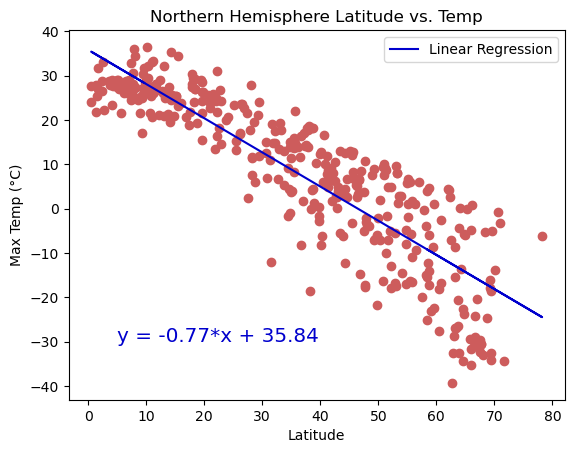

In [79]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Max Temp (" + chr(176) + "C)", 
                  "Northern Hemisphere Latitude vs. Temp", 
                  "indianred",
                  5,
                  -30)

The r-value is  0.6362525588883662


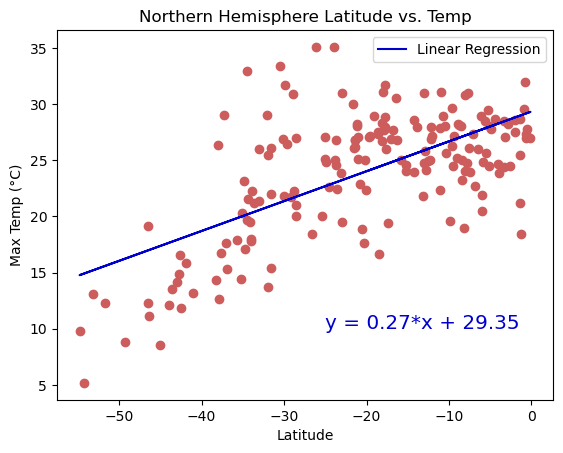

In [84]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Max Temp (" + chr(176) + "C)", 
                  "Northern Hemisphere Latitude vs. Temp", 
                  "indianred",
                  -25,
                  10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is  0.4335155362643821


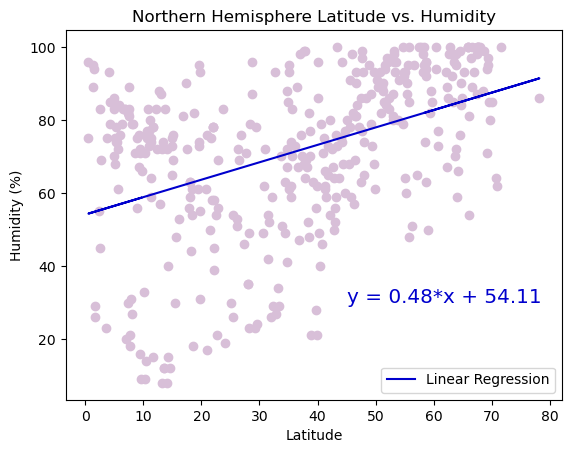

In [83]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Humidity (%)", 
                  "Northern Hemisphere Latitude vs. Humidity", 
                  "thistle",
                  45,
                  30)

The r-value is  0.22895867901022757


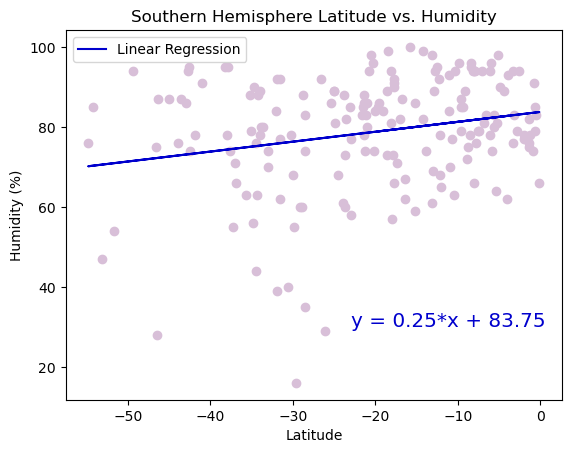

In [82]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Humidity (%)", 
                  "Southern Hemisphere Latitude vs. Humidity", 
                  "thistle",
                  -23,
                  30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is  0.3485402192011241


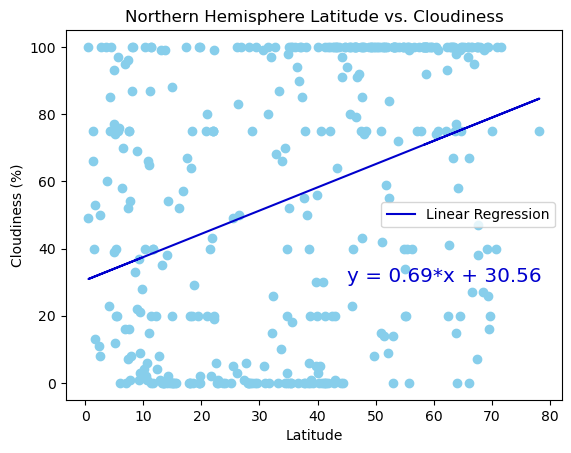

In [85]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Cloudiness (%)", 
                  "Northern Hemisphere Latitude vs. Cloudiness", 
                  "skyblue",
                  45,
                  30)

The r-value is  0.2906201912571855


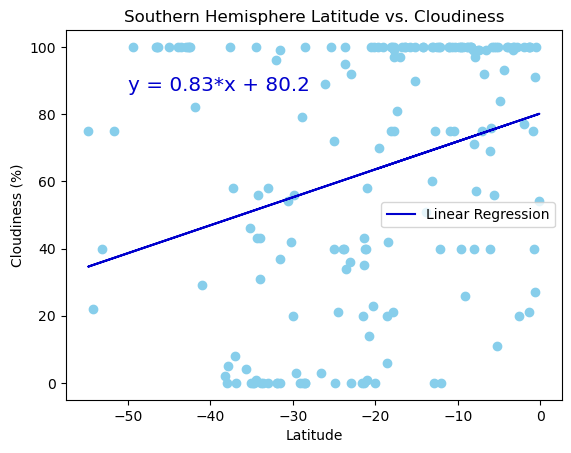

In [91]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Cloudiness (%)", 
                  "Southern Hemisphere Latitude vs. Cloudiness", 
                  "skyblue",
                  -50,
                  87)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is  -0.17552292380396398


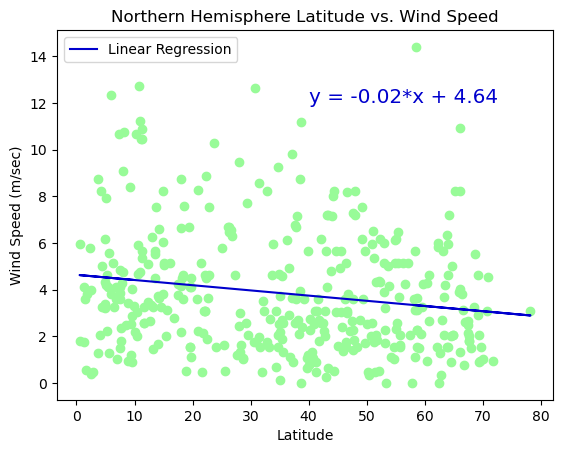

In [94]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Wind Speed (m/sec)", 
                  "Northern Hemisphere Latitude vs. Wind Speed", 
                  "palegreen",
                  40,
                  12)

The r-value is  -0.1983282559187326


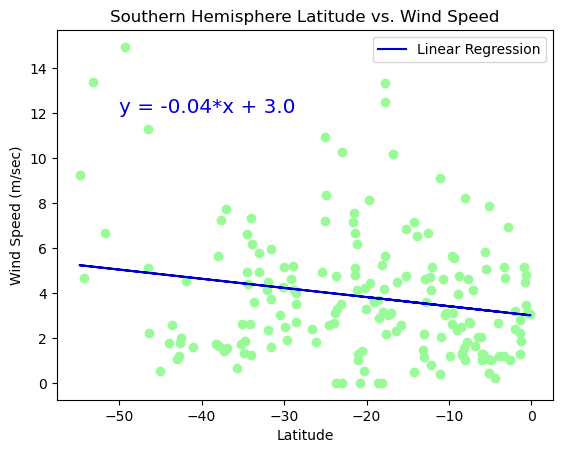

In [97]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']

# Call linear regression function to create plot
linear_regression(x_data, 
                  y_data, 
                  "Latitude", 
                  "Wind Speed (m/sec)", 
                  "Southern Hemisphere Latitude vs. Wind Speed", 
                  "palegreen",
                  -50,
                  12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE